<a href="https://colab.research.google.com/github/jabir-al-nahian/satellite-data-analysis/blob/main/satellite_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Installation**

Load your dataset

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-07-06 08:05:46--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip.1’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.05s   

2022-07-06 08:05:47 (24.1 MB/s) - ‘Mask_RCNN_basic_1.zip.1’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
replace Mask_RCNN/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Mask_RCNN/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace Mask_RCNN/MANIFEST.in? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace Mask_RCNN/MANIFEST.in? [y]es, [n]o, [A]ll, 

Using TensorFlow backend.


In [ ]:
!nvidia-smi

Wed Jul  6 08:07:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **2. Image Dataset**

Load your annotated dataset


In [ ]:
# Extract Images
images_path = "/content/drive/MyDrive/Colab Notebooks/road final/icmla.zip"
annotations_path = "/content/drive/MyDrive/Colab Notebooks/road final/labels_my-project-name_2022-07-04-11-29-20.json"

extract_images(os.path.join("/content/drive/MyDrive/Colab Notebooks/road final/",images_path), "/content/drive/MyDrive/Colab Notebooks/road final/dataset")

Extracted: 222 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/drive/MyDrive/Colab Notebooks/road final/", annotations_path), "/content/drive/MyDrive/Colab Notebooks/road final/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/drive/MyDrive/Colab Notebooks/road final/", annotations_path), "/content/drive/MyDrive/Colab Notebooks/road final/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/Colab Notebooks/road final/labels_my-project-name_2022-07-04-11-29-20.json
Annotation json path:  /content/drive/MyDrive/Colab Notebooks/road final/labels_my-project-name_2022-07-04-11-29-20.json
Train: 198
Validation: 24
Classes: 1


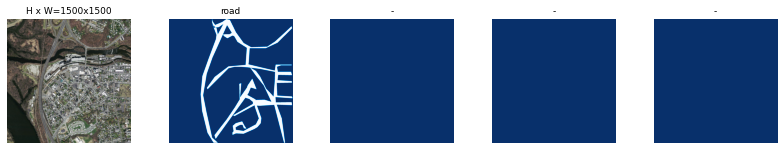

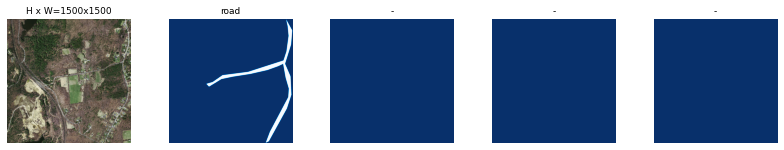

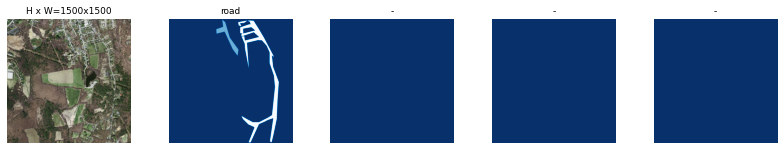

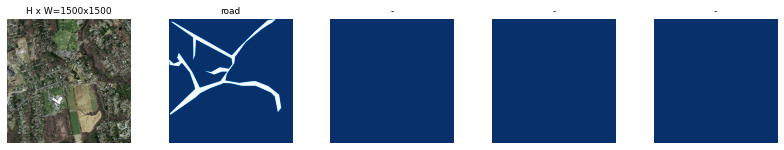

In [ ]:
# Load image samples
display_image_samples(dataset_train)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220706T0807/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

## **4. Detection (test your model on a random image)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220706T0807/mask_rcnn_object_0020.h5
Re-starting from epoch 20


original_image           shape: (512, 512, 3)         min:    4.00000  max:  253.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    4.00000  max:  253.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -119.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


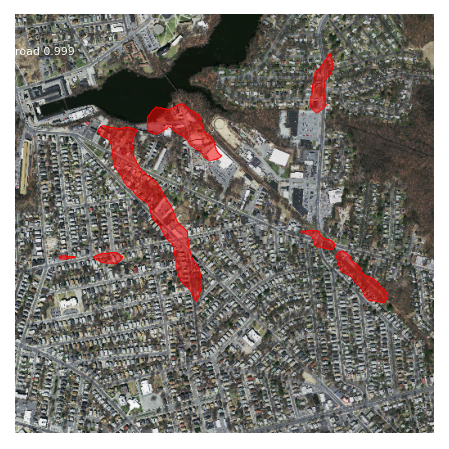

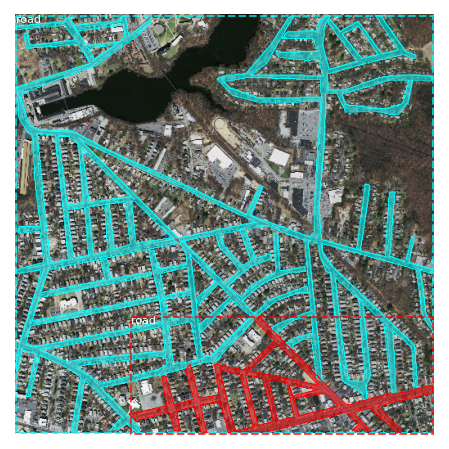

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)